In [5]:
import numpy as np

In [7]:
np.ones([10, 5]).shape

(10, 5)

In [9]:
np.ones([3, 4, 5], dtype = np.float64)

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]]])

In [8]:
np.ones([3, 4, 5], dtype = np.float64).strides

(160, 40, 8)

In [18]:
x = np.ones([1, 1])
x.strides

(8, 8)

# 데이터 읽어들이기

In [11]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [9]:
path = 'usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]
records[0]['tz']

u'America/New_York'

In [12]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df = pd.DataFrame(np.random.randn(6, 4), index = dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,0.950492,0.922032,0.821627,1.019339
2013-01-02,-1.249817,0.606123,2.043135,0.850740
2013-01-03,0.052320,-1.117715,-0.926410,-0.628798
2013-01-04,1.321216,0.035472,0.953792,1.593393
2013-01-05,0.407223,0.307209,0.979855,0.413357
2013-01-06,-1.453145,-1.611736,0.629192,0.300264


In [15]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':116000, 'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio       35000
Oregon    116000
Texas      71000
Utah        5000
dtype: int64

In [17]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states)
obj4

California       NaN
Ohio           35000
Oregon        116000
Texas          71000
dtype: float64

In [24]:
obj3 + obj4

California       NaN
Ohio           70000
Oregon        232000
Texas         142000
Utah             NaN
dtype: float64

In [21]:
import sys
reload(sys)
sys.getdefaultencoding()

In [23]:
sys.getdefaultencoding()

'ascii'

In [ ]:
sys.setdefaultencoding()

In [25]:
data = {'state':['경기', '강원', '서울', '충북', '인천'],
       'year':[2000, 2001, 2002, 2001, 2002], 'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
frame2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'], 
                      index = ['one', 'two', 'three', 'four', 'five'])

In [27]:
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [26]:
frame2['state']

one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object

In [30]:
frame2.ix['three']

year     2002
state      서울
pop       3.6
debt      NaN
Name: three, dtype: object

In [32]:
frame2.debt

one      NaN
two      NaN
three    NaN
four     NaN
five     NaN
Name: debt, dtype: object

In [33]:
val = pd.Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])
frame2.debt = val

In [34]:
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,-1.2
three,2002,서울,3.6,NaN
four,2001,충북,2.4,-1.5
five,2002,인천,2.9,-1.7


In [37]:
frame2['eastern'] = frame2.state == '서울'

In [38]:
frame2

,year,state,pop,debt,eastern
one,2000,경기,1.5,NaN,False
two,2001,강원,1.7,-1.2,False
three,2002,서울,3.6,NaN,True
four,2001,충북,2.4,-1.5,False
five,2002,인천,2.9,-1.7,False


In [39]:
del frame2['eastern']

In [40]:
frame2.columns

Index([u'year', u'state', u'pop', u'debt'], dtype='object')

In [42]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1, 2]})
right = pd.DataFrame({'key':['foo', 'foo'], 'rval':[4, 5]})
leftright = pd.merge(left, right, on = 'key')
leftright

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [43]:
left

,key,lval
0,foo,1
1,foo,2


In [45]:
right

,key,rval
0,foo,4
1,foo,5


In [46]:
s1 = pd.Series([7.3, -2.5, 3.4, 2.5], index = ['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])
s1 + s2

a    5.2
c    1.1
d    NaN
e    1.0
f    NaN
g    NaN
dtype: float64

In [53]:
s1.add(s2, fill_value = 0)

a    5.2
c    1.1
d    3.4
e    1.0
f    4.0
g    3.1
dtype: float64

In [54]:
frame = pd.DataFrame((np.random.randn(4, 3)), columns = list(['rain', 'income', 'tax']),
                    index = ['seoul', 'daejun', 'incheon', 'daegu'])
frame

,rain,income,tax
seoul,-1.136697,-0.295022,0.763787
daejun,-0.829821,0.958968,-0.838692
incheon,-0.173976,-0.068527,0.960949
daegu,0.943293,0.691408,-2.323611


In [55]:
np.abs(frame)

,rain,income,tax
seoul,1.136697,0.295022,0.763787
daejun,0.829821,0.958968,0.838692
incheon,0.173976,0.068527,0.960949
daegu,0.943293,0.691408,2.323611


In [56]:
f = lambda x : x.max() - x.min()
frame.apply(f)

rain      2.07999
income    1.25399
tax       3.28456
dtype: float64

In [57]:
frame.apply(f, axis = 1)

seoul      1.900483
daejun     1.797660
incheon    1.134925
daegu      3.266905
dtype: float64

In [58]:
def f1(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
frame.apply(f1)

,rain,income,tax
min,-1.136697,-0.295022,-2.323611
max,0.943293,0.958968,0.960949


In [59]:
# applymap - 각각 elements가 들어감
format = lambda x : '%.2f' % x
frame.applymap(format)

,rain,income,tax
seoul,-1.14,-0.30,0.76
daejun,-0.83,0.96,-0.84
incheon,-0.17,-0.07,0.96
daegu,0.94,0.69,-2.32


In [60]:
# map - Series가 들어감
frame.rain.map(format)

seoul      -1.14
daejun     -0.83
incheon    -0.17
daegu       0.94
Name: rain, dtype: object

# 브로드캐스팅 broadcasting

In [101]:
df = pd.DataFrame({'a':[0, 1, 2, 3], 'b':[0, 1, 2, 3], 'c':[0, 1, 2, 3]})
#df = pd.DataFrame([[0, 1, 2, 3], [0, 1, 2, 3], [0, 1, 2, 3]])
df

,a,b,c
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3


In [107]:
sr = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
#sr = pd.Series([1, 2, 3])
sr

a    1
b    2
c    3
dtype: int64

In [108]:
df + sr
#df.add(sr, axis = 0)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6


In [99]:
df.add(sr, axis = 1)

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6


In [95]:
df2 = pd.Series([1, 2, 3, 4])
df2

0    1
1    2
2    3
3    4
dtype: int64

In [96]:
df.add(df2, axis = 0)

,a,b,c
0,1,1,1
1,3,3,3
2,5,5,5
3,7,7,7


In [111]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
                 index = ['a', 'b', 'c', 'd'], columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [112]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [113]:
df.sum(axis = 1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [116]:
df.sum(axis = 1, skipna = False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [120]:
df.mean(axis = 1, skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

# hierarchical merge

In [121]:
left = pd.DataFrame({'key1':['b', 'b', 'a'], 'lval':range(3), 'key2':['one', 'two', 'one']})
right = pd.DataFrame({'key1':['b', 'b', 'a', 'a'], 'rval':range(4),
                     'key2':['one', 'two', 'one', 'two']})
pd.merge(left, right, on = ['key1', 'key2'], how = 'outer')

,key1,key2,lval,rval
0,b,one,0,0
1,b,two,1,1
2,a,one,2,2
3,a,two,NaN,3


In [122]:
data = pd.DataFrame(np.arange(6).reshape(2, 3), 
                    index = pd.Index(['index1', 'index2'], name = 'state'), 
                    columns = pd.Index(['one', 'two', 'three'], name = 'number'))
data

number,one,two,three
state,,,
index1,0,1,2
index2,3,4,5


In [127]:
result = data.stack('number')
result

state   number
index1  one       0
        two       1
        three     2
index2  one       3
        two       4
        three     5
dtype: int64

In [130]:
result.unstack()

number,one,two,three
state,,,
index1,0,1,2
index2,3,4,5


In [129]:
result.unstack('state')

state,index1,index2
number,,
one,0,3
two,1,4
three,2,5


In [156]:
data = pd.read_csv('macrodata.csv')

In [157]:
pd.read_csv('macrodata.csv').head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [158]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter, name = 'date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', name=u'date', length=203, freq='Q-DEC')

In [159]:
data = pd.DataFrame(data.to_records(), columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item'),
                   index = periods.to_timestamp('D', 'end'))
data[:10]

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2
1960-06-30,2834.390,0.14,5.2
1960-09-30,2839.022,2.70,5.6
1960-12-31,2802.616,1.21,6.3
1961-03-31,2819.264,-0.40,6.8


In [162]:
data.stack().reset_index()

,date,item,0
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [139]:
ldata = data.stack().reset_index().rename(columns = {0:'value'})
ldata[:10]

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [140]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [141]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,-1.496786
1,1959-03-31,infl,0.000,0.544163
2,1959-03-31,unemp,5.800,0.052261
3,1959-06-30,realgdp,2778.801,-0.938950
4,1959-06-30,infl,2.340,-0.312907
5,1959-06-30,unemp,5.100,-0.275937
6,1959-09-30,realgdp,2775.488,0.309263
7,1959-09-30,infl,2.740,-0.911590
8,1959-09-30,unemp,5.300,-1.464725
9,1959-12-31,realgdp,2785.204,0.525421


In [142]:
pivoted = ldata.pivot('date', 'item')
pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  0.544163 -1.496786  0.052261
1959-06-30  2.34  2778.801   5.1 -0.312907 -0.938950 -0.275937
1959-09-30  2.74  2775.488   5.3 -0.911590  0.309263 -1.464725
1959-12-31  0.27  2785.204   5.6 -0.207571  0.525421 -0.169162
1960-03-31  2.31  2847.699   5.2 -0.249305  1.703023 -1.052131

In [143]:
import matplotlib.pyplot as plt

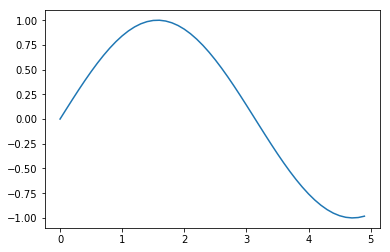

In [148]:
%matplotlib inline
x = np.arange(0, 5, 0.1)
y = np.sin(x)
plt.plot(x, y)
#plt.show()

In [151]:
%magic %matplotlib

In [154]:
%history

In [179]:
del fig, axes

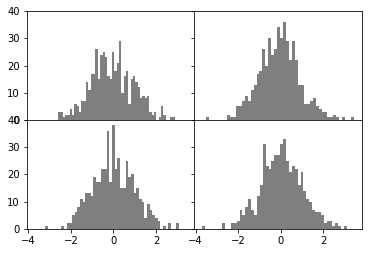

In [186]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
#fig, axes
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [184]:
data = np.random.randn(30).cumsum()
data

array([ -1.36829903,   0.0378638 ,  -1.61558594,  -0.7463864 ,
         0.29292165,   0.74652387,  -0.14435596,  -0.67857595,
         0.79689497,   2.02588793,   1.04277121,   0.49636207,
         2.26514121,   2.62462768,   3.13682425,   4.16712492,
         3.48988834,   3.85219731,   5.7999979 ,   6.77441884,
         7.36862909,   8.50668573,   9.01314308,   9.60028501,
         9.85022972,  10.10198393,  10.75219478,  11.61647173,
        11.57239387,  13.57546   ])

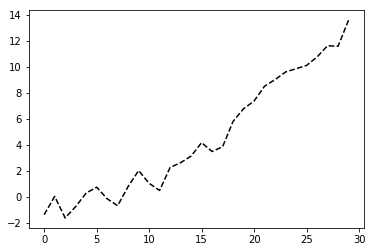

In [189]:
plt.plot(data, 'k--', label = 'Default')

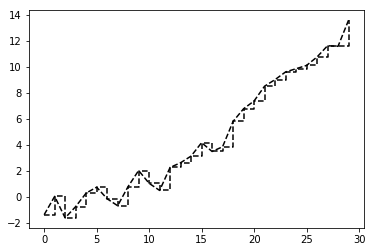

In [201]:
plt.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
#plt.plot(data, 'k--', drawstyle = 'steps-post')

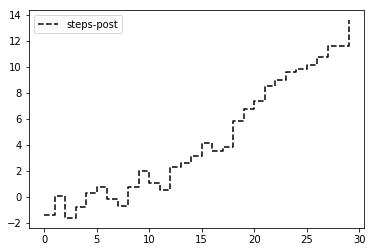

In [211]:
plt.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')
#plt.show()

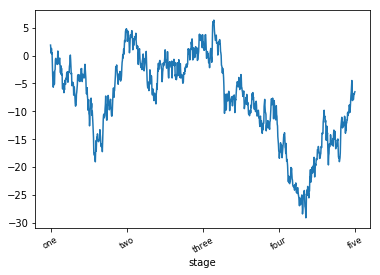

In [194]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize = 'small')
ax.set_xlabel('stage')
plt.show()

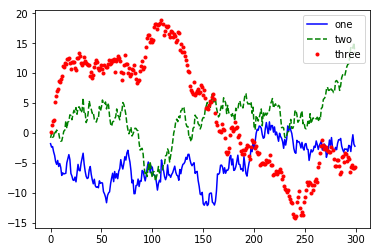

In [220]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(300).cumsum(), 'b', label = 'one')
ax.plot(np.random.randn(300).cumsum(), 'g--', label = 'two')
ax.plot(np.random.randn(300).cumsum(), 'r.', label = 'three')
ax.legend(loc = 'best')

In [224]:
# 파일 저장
plt.savefig('figpath.svg')
plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')

In [225]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)

In [227]:
plot_data = buffer.getvalue()
plot_data
plt.show()

In [228]:
import seaborn as sns

In [251]:
np.round(x, 0)

array([  0.,   1.,   2.,   3.,   4.,   6.,   7.,   8.,   9.,  10.])

In [246]:
y

array([   0.,    1.,    4.,    9.,   16.,   36.,   49.,   64.,   81.,  100.])

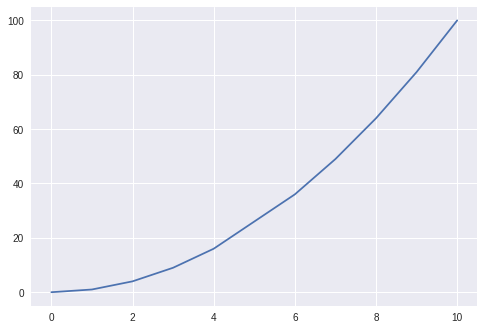

In [252]:
x = np.linspace(0, 10, 10)
y = np.power(np.round(x, 0), 2)
plt.plot(np.round(x, 0), y)
plt.show()

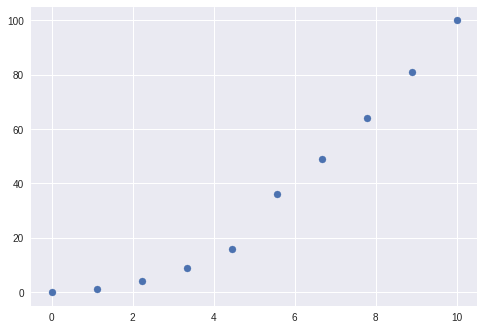

In [253]:
plt.scatter(x, y)